# Import Packages

In [ ]:
import matplotlib.pyplot as plt
from utils import create_dataset,model_plot,history_plot, read_data, plot_data, prepare_train_test_data
import numpy as np
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import LSTM
from sklearn.metrics import mean_absolute_error as mae
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [ ]:
clean_df, data = read_data('../../datasets/yt_subscribers.csv', debug=True)

         Date  Subscribers  Unnamed: 2  Unnamed: 3  Unnamed: 4
0   8/26/2024           40         NaN         NaN         NaN
1  10/13/2024           39         NaN         NaN         NaN
2   3/28/2024           38         NaN         NaN         NaN
3   8/25/2024           38         NaN         NaN         NaN
4   7/18/2024           37         NaN         NaN         NaN
5   9/16/2024           36         NaN         NaN         NaN
6   8/10/2024           34         NaN         NaN         NaN
7   7/26/2024           33         NaN         NaN         NaN
8    9/1/2024           33         NaN         NaN         NaN
9   11/4/2024           33         NaN         NaN         NaN
----------------------------------------------------
          Date  Subscribers
254 2023-11-15           13
336 2023-11-16            8
349 2023-11-17            6
301 2023-11-18           10
215 2023-11-19           15
180 2023-11-20           17
361 2023-11-21            3
337 2023-11-22            8
35

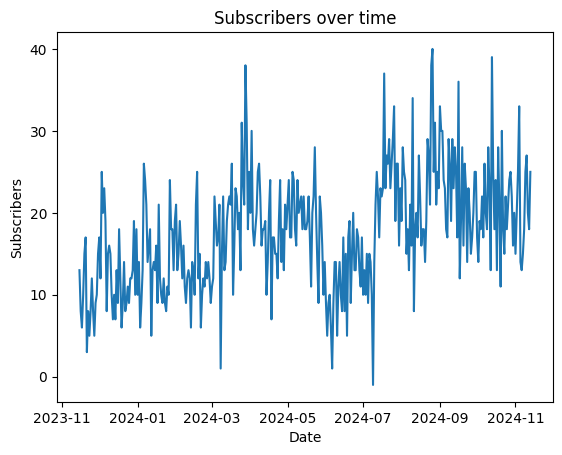

In [ ]:
plot_data(clean_df["Subscribers"], title="Subscribers over time", x_label="Date", y_label="Subscribers")

In [ ]:
def prepare_train_test_data(data, time_step_in, time_step_out, test_size=0.2):
    X, Y = create_dataset(data, time_step_in, time_step_out)
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size)

    # Separate scalers for X and Y
    scaler_X = MinMaxScaler(feature_range=(0,1))
    scaler_Y = MinMaxScaler(feature_range=(0,1))
    x_train = scaler_X.fit_transform(X_train)
    y_train = scaler_Y.fit_transform(Y_train)
    x_test = scaler_X.transform(X_test)
    y_test = scaler_Y.transform(Y_test)

    print(f'x_train shape: {x_train.shape}, y_train shape: {y_train.shape}, x_test shape: {x_test.shape}, y_test shape: {y_test.shape}')
    
    return x_train, x_test, y_train, y_test, scaler_X, scaler_Y
x_train, x_test, y_train, y_test, scaler_X, scaler_Y = prepare_train_test_data(data, time_step_in=30, time_step_out=7, test_size=0.2)

x_train shape: (262, 30), y_train shape: (262, 7), x_test shape: (66, 30), y_test shape: (66, 7)


## model definition

In [ ]:
lstm_model=Sequential()
lstm_model.add(LSTM(50,return_sequences=True,input_shape=(30,1)))
lstm_model.add(LSTM(50,return_sequences=True))
lstm_model.add(LSTM(50))
lstm_model.add(Dense(7))
lstm_model.compile(loss='mean_absolute_error', optimizer=Adam(learning_rate=0.03), metrics=['mean_absolute_error'])
lstm_model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_9 (LSTM)                   │ (None, 30, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_10 (LSTM)                  │ (None, 30, 50)         │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_11 (LSTM)                  │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 7)              │           357 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 51,157 (199.83 KB)

 Trainable params: 51,157 (199.83 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history=lstm_model.fit(
    x_train,y_train,
    epochs=100,
    validation_data=(x_test,y_test),
    verbose=1,
)

Epoch 1/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - loss: 0.4270 - mean_absolute_error: 0.4270 - val_loss: 0.1596 - val_mean_absolute_error: 0.1596
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.1508 - mean_absolute_error: 0.1508 - val_loss: 0.1481 - val_mean_absolute_error: 0.1481
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.1403 - mean_absolute_error: 0.1403 - val_loss: 0.1503 - val_mean_absolute_error: 0.1503
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.1426 - mean_absolute_error: 0.1426 - val_loss: 0.1489 - val_mean_absolute_error: 0.1489
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.1421 - mean_absolute_error: 0.1421 - val_loss: 0.1460 - val_mean_absolute_error: 0.1460
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.1403 - mean_absolute_error: 0.1403 - val_loss: 0.1459 - val_mean_absolute_error: 0.1459
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.1353 - mean_absolute_error: 0.1353 - val_loss: 0.145

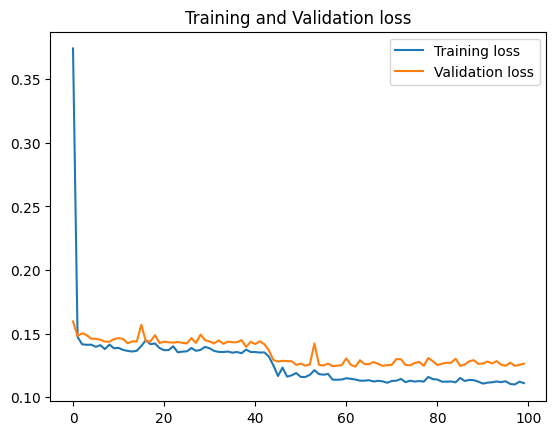

In [ ]:
history_plot(history)

In [ ]:
train_predicted=lstm_model.predict(x_train)
test_predicted=lstm_model.predict(x_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


In [ ]:
mae_error_train= mae(y_train,train_predicted)
mae_error_test= mae(y_test,test_predicted)
print(f"MAE Train data  : {mae_error_train} ")
print(f"MAE  Test data : {mae_error_test} ")

MAE Train data  : 0.10952270289902731 
MAE  Test data : 0.12638621369054 


In [ ]:
all_predictions = []
input_window = x_test[-1]  

for i in range(1, 6): 
    print(f'Step {i} ==> Input Window: {input_window}')
    
    y_temp = lstm_model.predict(input_window.reshape(1, -1))
    print(f"Prediction Output (y_temp): {y_temp}")
    all_predictions.extend(y_temp[0])  # Add all predicted values from y_temp to the list
    input_window = np.roll(input_window, -1, axis=0)
    input_window[-1] = y_temp[0][0] 

Step 1 ==> Input Window: [0.17073171 0.23076923 0.31707317 0.25641026 0.36585366 0.31707317
 0.36585366 0.28947368 0.26315789 0.3        0.31707317 0.575
 0.48780488 0.38461538 0.43902439 0.51282051 0.         0.41025641
 0.575      0.34146341 0.36585366 0.4        0.53658537 0.575
 0.53658537 0.65853659 0.26829268 0.41463415 0.56410256 0.53846154]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Prediction Output (y_temp): [[0.51052713 0.5095898  0.50023127 0.4606513  0.5126134  0.48433274
  0.50986826]]
Step 2 ==> Input Window: [0.23076923 0.31707317 0.25641026 0.36585366 0.31707317 0.36585366
 0.28947368 0.26315789 0.3        0.31707317 0.575      0.48780488
 0.38461538 0.43902439 0.51282051 0.         0.41025641 0.575
 0.34146341 0.36585366 0.4        0.53658537 0.575      0.53658537
 0.65853659 0.26829268 0.41463415 0.56410256 0.53846154 0.51052713]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Prediction Output (y_temp): [[0.5323438  0.53286743 0.5221906  0.4828128  0.5390977  0.5041934
  0.5296891

In [ ]:
all_predictions=np.array(all_predictions)

In [ ]:
num_samples = len(all_predictions) // 7
all_predictions_reshaped = all_predictions.reshape(num_samples, 7)
y_next_30 = scaler_Y.inverse_transform(all_predictions_reshaped)
y_next_30=np.round(y_next_30)
print(y_next_30)

[[20. 19. 19. 19. 20. 19. 19.]
 [21. 20. 20. 19. 21. 20. 20.]
 [22. 21. 21. 21. 23. 21. 21.]
 [23. 22. 22. 22. 24. 22. 22.]
 [24. 23. 23. 22. 25. 23. 23.]]


In [ ]:
x_test=scaler_X.inverse_transform(x_test)
x_train=scaler_X.inverse_transform(x_train)

In [ ]:
x_test[-1]

array([ 6., 10., 12., 11., 14., 12., 14., 12.,  9., 11., 12., 22., 19.,
       16., 17., 21.,  1., 15., 22., 13., 14., 19., 21., 22., 21., 26.,
       10., 16., 23., 22.])

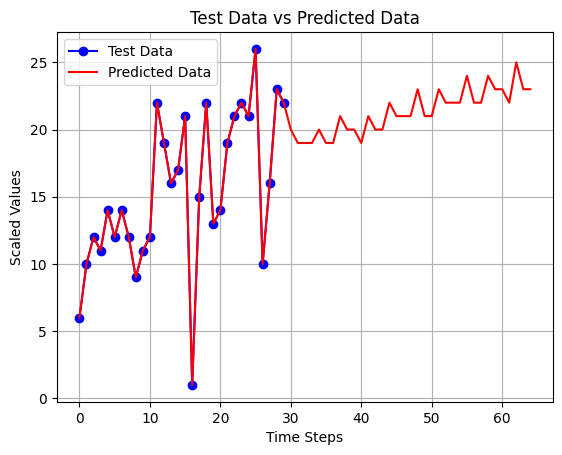

In [ ]:
plt.plot(x_test[-1], label='Test Data', color='blue', marker='o')
plt.plot(np.hstack([x_test[-1], y_next_30.reshape(-1)]), label='Predicted Data', color='red')
plt.title('Test Data vs Predicted Data')
plt.xlabel('Time Steps')
plt.ylabel('Scaled Values')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
last_date = clean_df.index[-1]
total_sub = np.sum(np.array(clean_df['Subscribers']))
total_next_30 = np.sum(y_next_30)
print(f"Total subscribers till {last_date}: {total_sub}, next_30_days: {np.round(total_next_30)} => final after 30 days: {total_sub + round(total_next_30)}")

Total subscribers till 2024-11-13 00:00:00: 6383, next_7_days: 746.0 => final after 7 days: 7129
